Título: 

- Cheat detection on Call of Duty using unsupervised learning.

Reporte No. 1. Propuesta del proyecto

- Asesor principal: Oleg Jarma Montoya.

Autor@s

- Dagoberto Borré

Introducción

- Con este proyecto se busca identificar tramposos dentro del juego COD Modern Warfare haciendo uso de las herramientas aprendidas en el curso, principalmente de aprendizaje no supervisado.

Descripción del problema

- La trampa es uno de los principales problemas que enfrenta la industria de los videjuegos en partiuclar los first person shooters (FPS)

Fuentes de datos

- La fuente principal de la informacion es Kaggle de donde se extrajo el dataset base de la investigacion: https://www.kaggle.com/datasets/aishahakami/call-of-duty-players

Procesamiento ETL Recuerden que ETL significa Extracción, Transformación y Carga de datos). Describen como se hará todo el proeprocesmaiento de información.

- La informacion se depuró de forma que se eliminaron algunas columnas y filas cuya información resultaba NO relevante o que podia afectar los datos por ser datos atipicos o muy raros con respecto al resto de la data

Exploración de los datos Indicar que técnicas usaran inicialmente para describir y entender sus datos:

- Se realizó una revision general de los datos usando la libreria sweetviz que permite tener una visión general de los datos con información estadistica relevante

Técnicas de modelación propuestas

- Se están utilizando librerias de sklearn para hallar los k-means y Clustering por medio de Matplotlib para graficar los datos 

Resultados esperados

-  Se espera que el modelo pueda identificar un tramposo basado en la data del mismo, y teniendo como referencia ciertas variable especificas como el kdRatio (o ratio de asesinatos/muertes), timePlayed (tiempo jugado), headshots (tiros a la cabeza) y level (nivel) entre otros.

In [3]:
import pandas as pd
import openpyxl as op
import numpy as np
import sweetviz as sv
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib
from matplotlib import pyplot as plt
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [2]:
base=pd.read_excel('/Users/dagobertoborre/Documents/Diplomado/Base_COD.xlsx')

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1282 non-null   object 
 1   wins            1282 non-null   int64  
 2   kills           1282 non-null   int64  
 3   kdRatio         1282 non-null   float64
 4   killstreak      1282 non-null   int64  
 5   level           1282 non-null   int64  
 6   losses          1282 non-null   int64  
 7   prestige        1282 non-null   int64  
 8   hits            1282 non-null   int64  
 9   timePlayed      1282 non-null   int64  
 10  headshots       1282 non-null   int64  
 11  gamesPlayed     1282 non-null   int64  
 12  assists         1282 non-null   int64  
 13  misses          1282 non-null   int64  
 14  xp              1282 non-null   int64  
 15  scorePerMinute  1282 non-null   float64
 16  shots           1282 non-null   int64  
 17  deaths          1282 non-null   i

Muestra de datos

In [5]:
df = pd.DataFrame(base)
print(df)
print(df.dtypes)

                          name  wins  kills   kdRatio  killstreak  level  \
0     Christian24Ramos#9910128     0   2972  1.188325           0    128   
1         Stone Island#4702149     0   1695  0.968571           0    112   
2             Hoss2422#8165512    16   1531  0.730091           0     74   
3          Persian Don#8581151     0    887  0.939619           0     48   
4              Armiiin#4020761     0    852  0.972603           0     45   
...                        ...   ...    ...       ...         ...    ...   
1277    Diegoortiz2050#1974630     7      7  0.184211           2      1   
1278     boondoks_gang#3234092     0      1  0.076923           1      1   
1279         usmigal66#6816012     3      3  0.136364           1      1   
1280   goodgoodjones17#1655197     4      1  0.024390           1      1   
1281          GWBDOE92#1356084     1      1  0.050000           1      1   

      losses  prestige  hits  timePlayed  headshots  gamesPlayed  assists  \
0         

In [6]:
import numpy as np
df['kdRatio'] = df['kdRatio'].apply(np.int64)
print(df.dtypes)

name               object
wins                int64
kills               int64
kdRatio             int64
killstreak          int64
level               int64
losses              int64
prestige            int64
hits                int64
timePlayed          int64
headshots           int64
gamesPlayed         int64
assists             int64
misses              int64
xp                  int64
scorePerMinute    float64
shots               int64
deaths              int64
dtype: object


In [7]:
df['scorePerMinute'] = df['scorePerMinute'].apply(np.int64)
print(df.dtypes)

name              object
wins               int64
kills              int64
kdRatio            int64
killstreak         int64
level              int64
losses             int64
prestige           int64
hits               int64
timePlayed         int64
headshots          int64
gamesPlayed        int64
assists            int64
misses             int64
xp                 int64
scorePerMinute     int64
shots              int64
deaths             int64
dtype: object


In [8]:
base.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.00000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1.282000e+03,1282.000000,1.282000e+03,1282.000000
mean,185.921217,4560.980499,0.235569,8.379875,53.76131,6.072543,56.692668,12554.159126,517.508580,766.449298,141.818253,833.431357,55121.117785,1.060483e+06,130.092044,6.767516e+04,4709.506240
std,323.606918,8528.773241,0.440759,10.659590,71.96835,7.289179,51.645801,24748.156401,838.963177,1402.242161,276.245584,1636.792735,105429.724045,1.928776e+06,115.955223,1.295096e+05,8585.815285
min,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000e+00,0.000000
25%,1.000000,36.250000,0.000000,0.000000,5.00000,1.000000,0.000000,0.000000,18.000000,7.000000,0.000000,5.000000,0.000000,1.729625e+04,0.000000,0.000000e+00,70.000000
50%,34.000000,615.000000,0.000000,8.000000,22.00000,4.000000,45.000000,1104.000000,121.500000,106.000000,14.500000,111.000000,5545.000000,1.792825e+05,128.000000,6.482500e+03,724.000000
75%,244.000000,5226.000000,0.000000,13.000000,74.00000,9.000000,110.000000,13286.250000,688.000000,906.250000,165.000000,850.750000,62238.250000,1.167748e+06,237.000000,7.563675e+04,5466.500000
max,3519.000000,66935.000000,3.000000,235.000000,435.00000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.000000,1.166620e+06,67888.000000


In [9]:
print(base.groupby('kdRatio').size())

kdRatio
0.024390    1
0.031250    1
0.036364    1
0.045455    1
0.047619    1
           ..
2.171183    1
2.280000    1
2.437500    1
2.500000    1
3.000000    1
Length: 1148, dtype: int64


/var/folders/js/5rv9ppjs681003sl1qttpt_w0000gn/T/ipykernel_1220/3385288854.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  base.drop(['kdRatio'],1).hist()


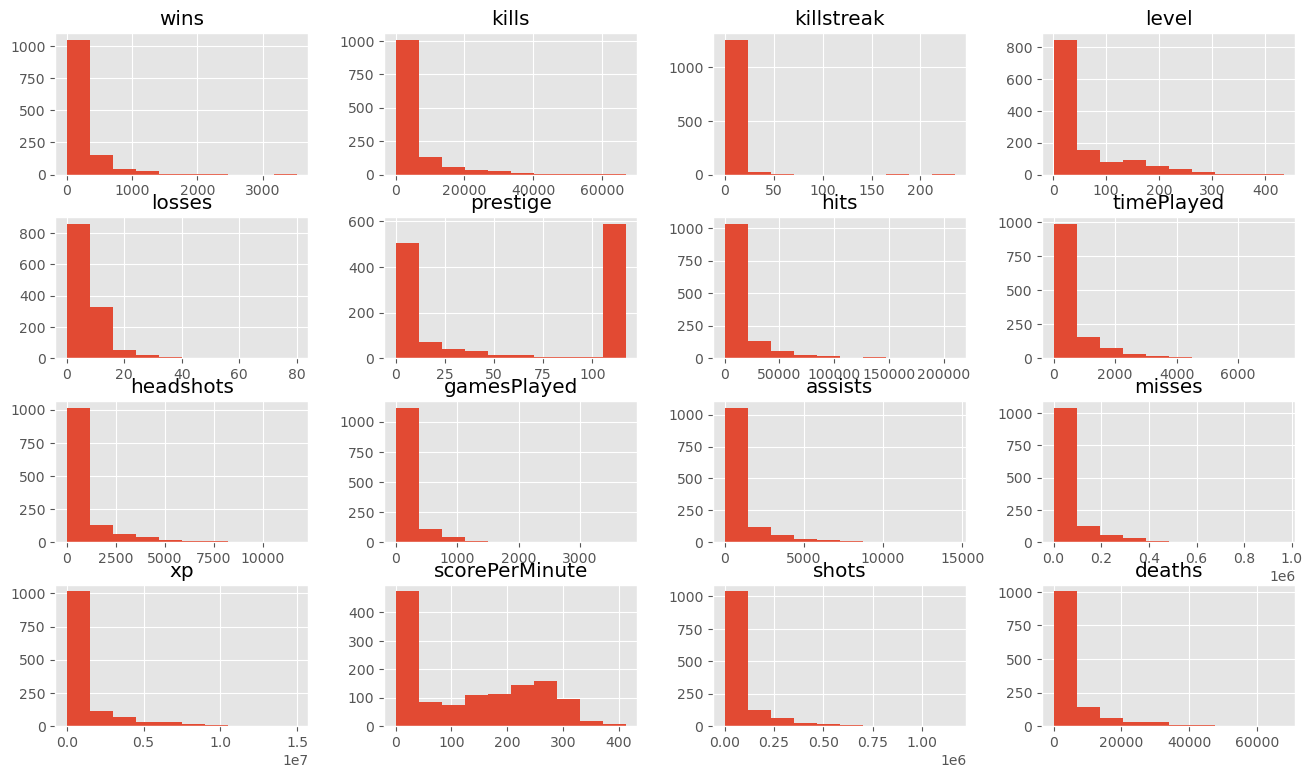

In [10]:
base.drop(['kdRatio'],1).hist()
plt.show()

Estadisticas y grafica univariadas

Visualización de Datos

/Users/dagobertoborre/opt/anaconda3/envs/pytonenv/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


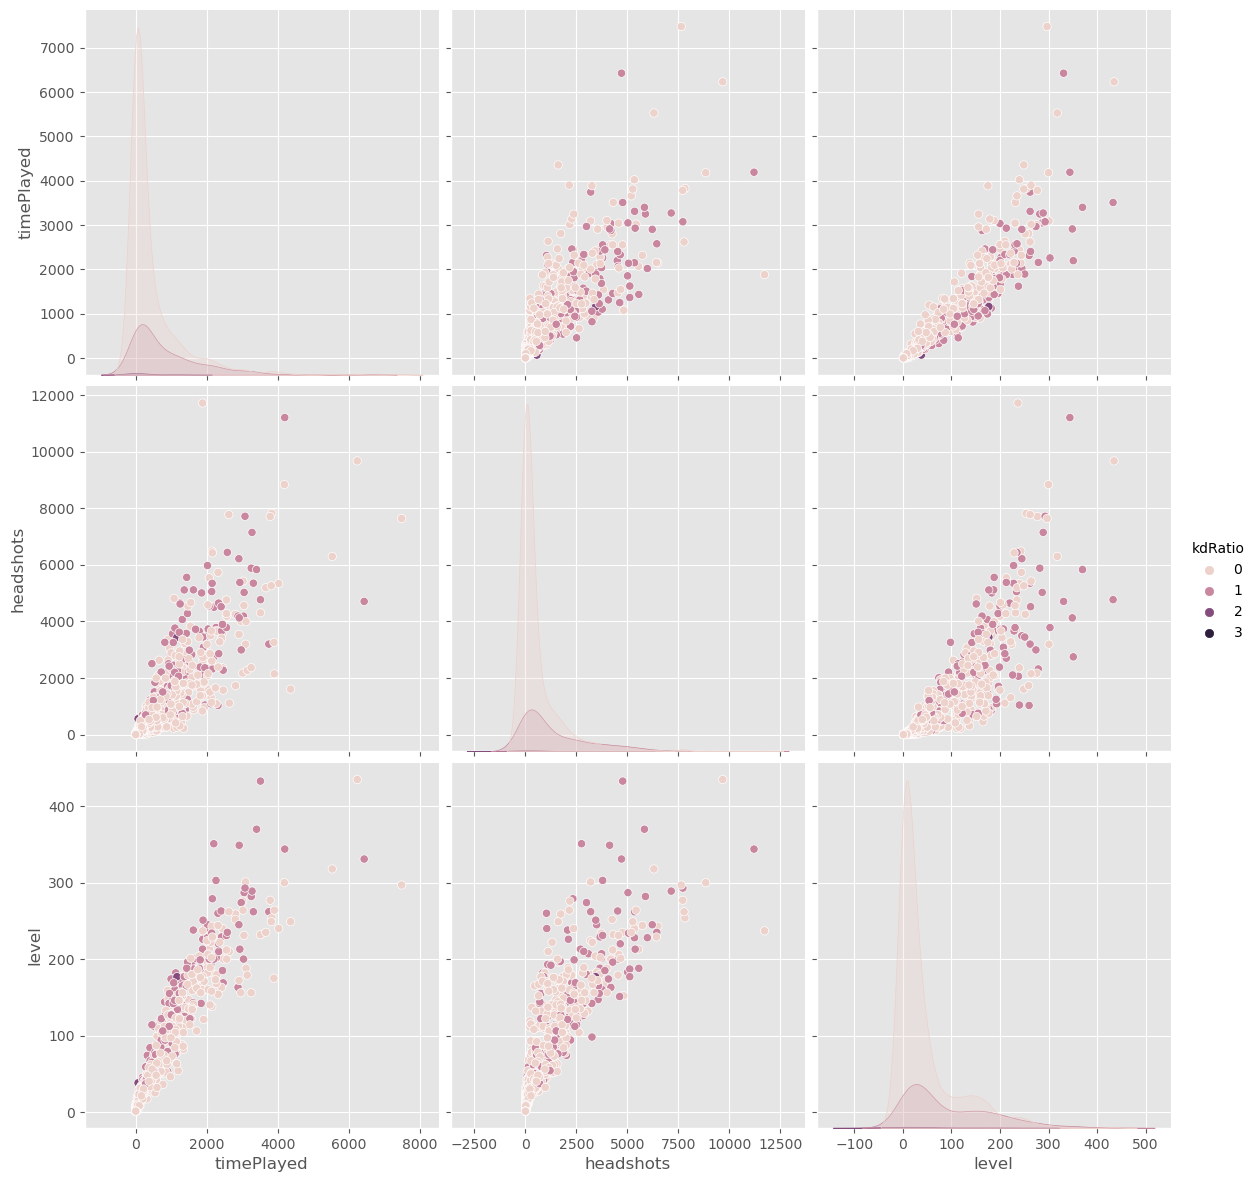

In [11]:
sb.pairplot(base.dropna(), hue='kdRatio',size=4,vars=["timePlayed","headshots","level"],kind='scatter')

Se define la estructura de datos que utilizaremos para alimentar el algoritmo

In [12]:
X = np.array(base[["timePlayed","headshots","level"]])
y = np.array(base['kdRatio'])
X.shape

(1282, 3)

Buscamos la curve de codo para determinar el valor K y los clusters que se van a visualizar

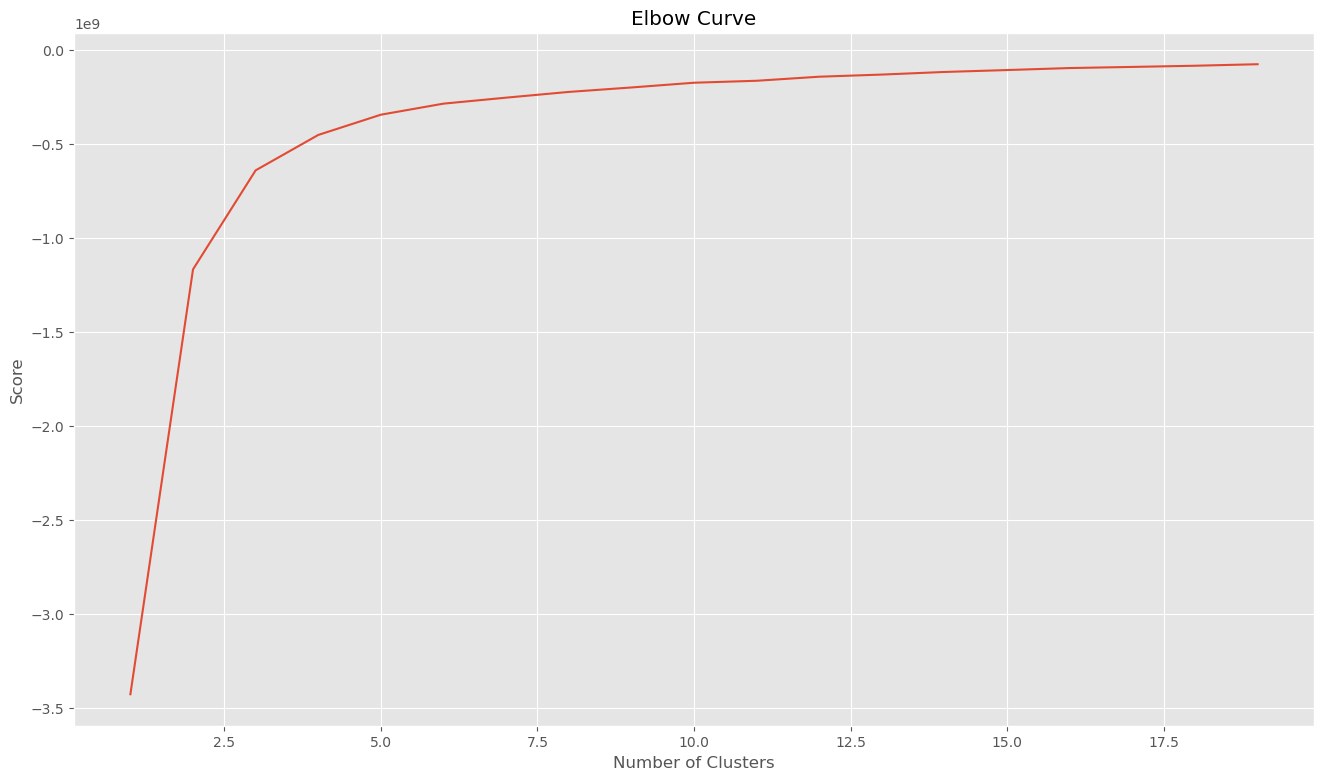

In [13]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 833.25480769 1045.20673077   89.59615385]
 [4188.09090909 8503.09090909  300.54545455]
 [1587.71428571 2400.23529412  160.7394958 ]
 [  99.36488027   91.91220068   14.75826682]
 [2507.14925373 4558.44776119  222.52238806]]


In [28]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<Figure size 1600x900 with 0 Axes>

In [30]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

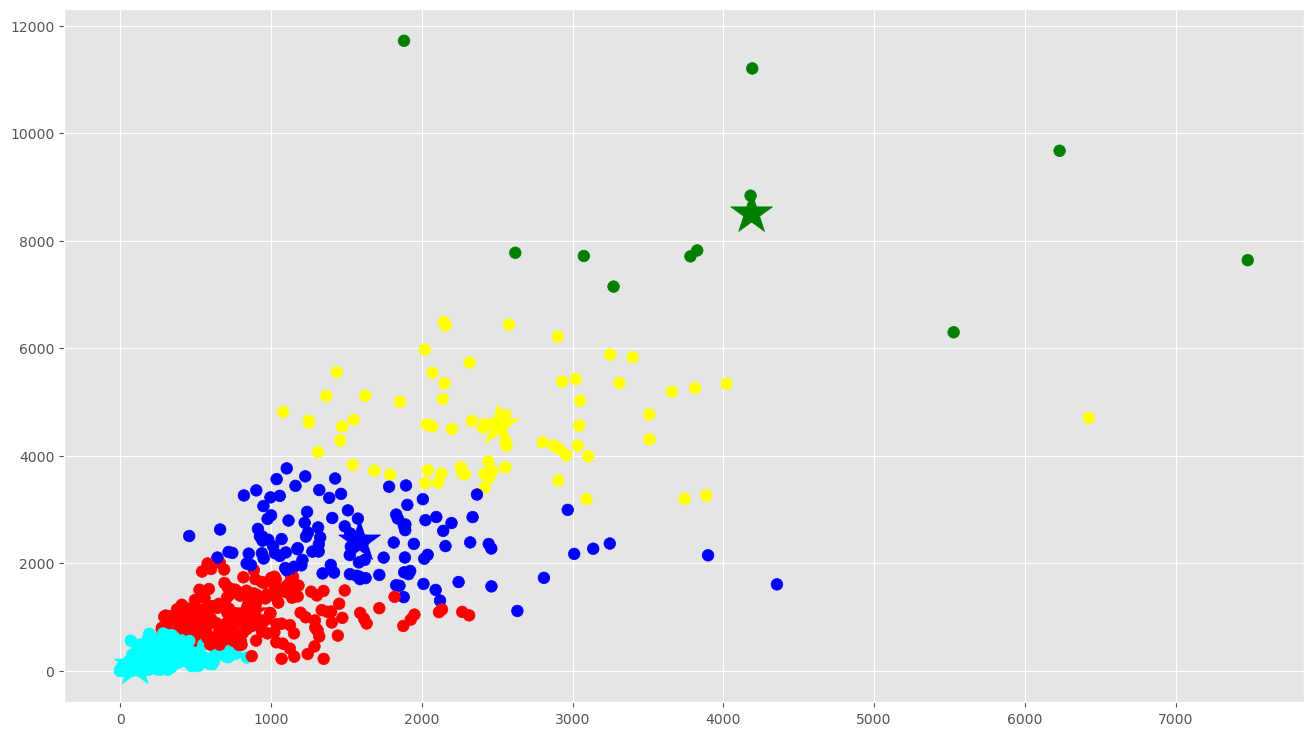

In [35]:
# Getting the values and plotting it
f1 = base['timePlayed'].values
f2 = base['headshots'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

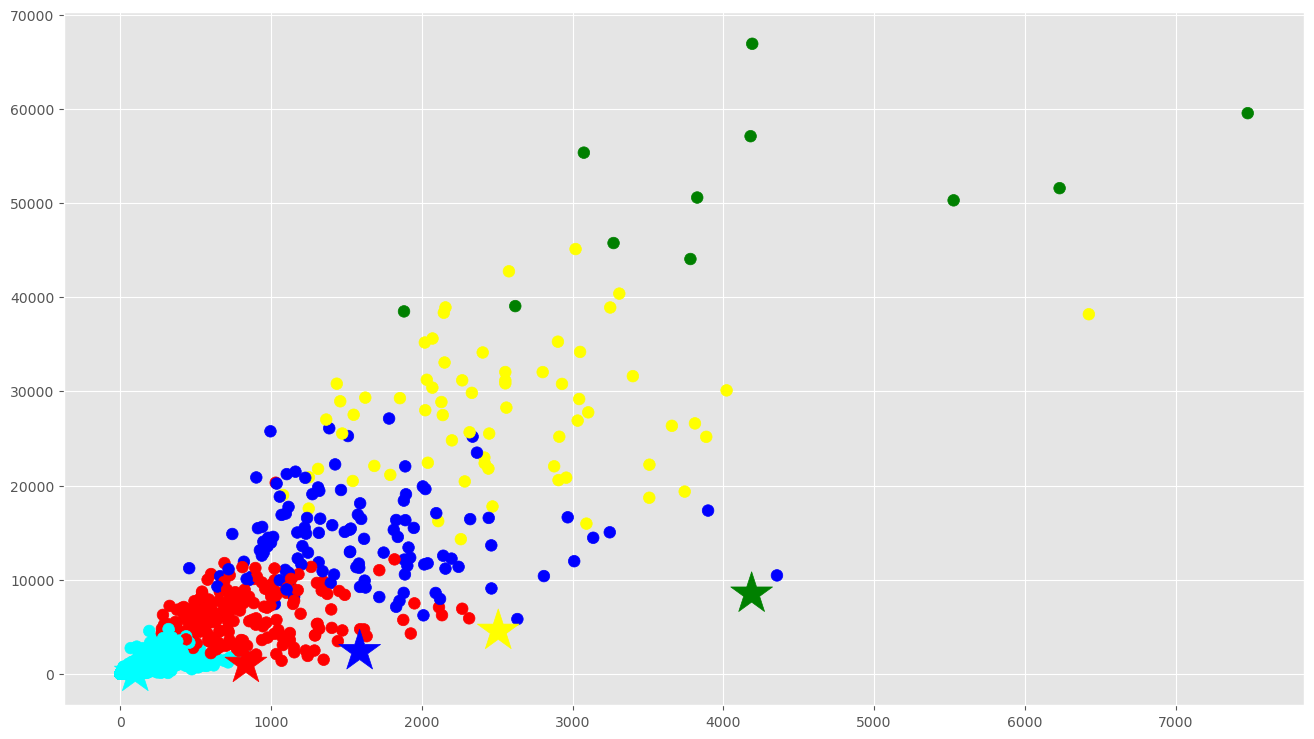

In [42]:
# Getting the values and plotting it
f1 = base['timePlayed'].values
f2 = base['kills'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [45]:
copy =  pd.DataFrame()
copy['timePlayed']=base['timePlayed'].values
copy['kdRatio']=base['kdRatio'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,208
1,green,11
2,blue,119
3,cyan,877
4,yellow,67


In [48]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([629, 696, 604, 692, 797])